In [3]:
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd
import csv


In [4]:
# 读取数据
e = nx.read_pajek("egypt_retweets.net")
len(e) # 该图共有 25178节点

25178

# 组元和子图

In [5]:
sub_groups=nx.connected_components(e)
sub_groups_list = list(sub_groups)
len(sub_groups_list) # 该图被分成3122个组元子图

3122

In [6]:
x = [len(c) for c in sub_groups_list]
x_counts = pd.value_counts(x) # 统计各组元子图的频数
x_counts  #  最大的子图包含17762 个节点，包含2个节点的子图有2429个

2        2429
3         428
4         118
1          42
5          41
6          26
9          11
7           7
8           7
10          5
11          2
16          2
13          1
17762       1
64          1
14          1
dtype: int64

In [7]:
#筛选出度数大于1的节点，并重新构建网络图
def trim_edges(g,weight =1):
    g2 = nx.Graph() # 创建空图
    for f,to,edata in g.edges(data = True):
        if edata["weight"]>weight:     #edge attribute (by default `weight`)
            g2.add_edge(f,to,edata)
    return g2    

In [8]:
# 网络中的岛屿方法
def island_method(g,iterations = 5):
    weights = [edata["weight"] for f, to, edata in g.edges(data =True)]
    mn = int(min(weights))
    mx = int(max(weights))
    
    step = int((mx-mn)/iterations)
    return [[threshold,trim_edges(g,threshold)] for threshold in range (mn,mx,step)]

In [64]:
cc = max(nx.connected_components(e),key=len)  # connected_components默认降序排序

islands = island_method(cc)
for i in islands:
    print(i[0],len(i[1]),len(list(nx.connected_components(i[1]))))

AttributeError: 'set' object has no attribute 'edges'

In [74]:
#a= max(nx.connected_components(e),key=len) 

for i in nx.connected_components(e):
    if i==0:
        gg = e.subgraph(c)


In [77]:
S = [e.subgraph(c).copy() for c in nx.connected_components(e)]

NetworkXError: nbunch is not a node or a sequence of nodes.

# 自我中心网络

In [10]:
nx.ego_graph(e,"justinbieber")


In [11]:
#将自我中心网络转化为一个简单的图。以justinbieber的自我中心图为例，仅有22人转发其推特
bieb = nx.Graph(nx.ego_graph(e,"justinbieber",radius = 2))
len(bieb)  #自我中心网络中度为22,


22

In [12]:
nx.average_clustering(bieb)

0.12727272727272726

In [13]:
# Ghonim是新一代埃及人，google主管.人们对他的信息转发较多，形成信任网络
ghonim = nx.Graph(nx.ego_graph(e,"Ghonim",radius = 2))
len(ghonim)

3450

In [14]:
nx.average_clustering(ghonim)

0.04332254475699311

# 三元组

In [15]:
# 打开文件
in_file = csv.reader(open("9_11_edgelist.txt","r"))


In [16]:
g = nx.Graph()
for line in in_file:
    g.add_edge(line[0],line[1],weight = line[2],conf = line[3])


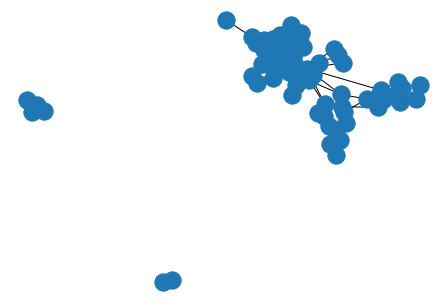

['Hani Hanjour', 'Majed Moqed', 'Nawaf Alhazmi', 'Khalid Al-Mihdhar', 'Lotfi Raissi', 'Bandar Alhazmi', 'Rayed Mohammed Abdullah', 'Salem Alhazmi', 'Hamza Alghamdi', 'Ahmed Alnami', 'Saeed Alghamdi', 'Abdussattar Shaikh', 'Osama Awadallah', 'Mohamed Atta', 'Abdul Aziz Al-Omari', 'Marwan Al-Shehhi', 'Ziad Jarrah', 'Said Bahaji', 'Ramzi Bin al-Shibh', 'Zakariya Essabar', 'Essid Sami Ben Khemais', 'Waleed Alshehri', 'Wail Alshehri', 'Satam Suqami', 'Fayez Ahmed', 'Mohand Alshehri', 'Mustafa Ahmed al-Hisawi', 'Ahmed Alghamdi', 'Ahmed Al Haznawi', 'Zacarias Moussaoui', 'Djamal Beghal', 'Jerome Courtaillier', 'David Courtaillier', 'Ahmed Ressam', 'Kamel Daoudi', 'Tarek Maaroufi', 'Faisal Al Salmi', 'Mohamed Abdi', 'Mamoun Darkazanli', 'Ahmed Khalil Ibrahim Samir Al-Ani', 'Agus Budiman', 'Mounir El Motassadeq ', 'Abdelghani Mzoudi', 'Imad Eddin Barakat Yarkas', 'Nabil al-Marabh', 'Raed Hijazi', 'Abu Qatada', 'Mamduh Mahmud Salim', 'Mohammed Belfas', 'Abu Walid', 'Mohammed Jaweed Azmath', 'Ayu

In [20]:
#确定所有的节点都具有flight属性
for n in g.nodes():
    g.nodes[n]["flight"] = "None"

nx.draw(g)
plot.show()

print(g.nodes)  # 打印节点属性

In [21]:
attrb = csv.reader(open("9_11_attrib.txt","r"))
for line in attrb:
    g.nodes[line[0]]["flight"] = line[1]

print(g.nodes)

['Hani Hanjour', 'Majed Moqed', 'Nawaf Alhazmi', 'Khalid Al-Mihdhar', 'Lotfi Raissi', 'Bandar Alhazmi', 'Rayed Mohammed Abdullah', 'Salem Alhazmi', 'Hamza Alghamdi', 'Ahmed Alnami', 'Saeed Alghamdi', 'Abdussattar Shaikh', 'Osama Awadallah', 'Mohamed Atta', 'Abdul Aziz Al-Omari', 'Marwan Al-Shehhi', 'Ziad Jarrah', 'Said Bahaji', 'Ramzi Bin al-Shibh', 'Zakariya Essabar', 'Essid Sami Ben Khemais', 'Waleed Alshehri', 'Wail Alshehri', 'Satam Suqami', 'Fayez Ahmed', 'Mohand Alshehri', 'Mustafa Ahmed al-Hisawi', 'Ahmed Alghamdi', 'Ahmed Al Haznawi', 'Zacarias Moussaoui', 'Djamal Beghal', 'Jerome Courtaillier', 'David Courtaillier', 'Ahmed Ressam', 'Kamel Daoudi', 'Tarek Maaroufi', 'Faisal Al Salmi', 'Mohamed Abdi', 'Mamoun Darkazanli', 'Ahmed Khalil Ibrahim Samir Al-Ani', 'Agus Budiman', 'Mounir El Motassadeq ', 'Abdelghani Mzoudi', 'Imad Eddin Barakat Yarkas', 'Nabil al-Marabh', 'Raed Hijazi', 'Abu Qatada', 'Mamduh Mahmud Salim', 'Mohammed Belfas', 'Abu Walid', 'Mohammed Jaweed Azmath', 'Ayu

In [23]:
components = nx.connected_components(g)  # 默认按照从大到小的顺序排列

In [29]:
list(components)[0]

{'Abdelghani Mzoudi',
 'Abdul Aziz Al-Omari',
 'Abdussattar Shaikh',
 'Abu Qatada',
 'Abu Walid',
 'Abu Zubeida',
 'Agus Budiman',
 'Ahmed Al Haznawi',
 'Ahmed Alghamdi',
 'Ahmed Alnami',
 'Ahmed Khalil Ibrahim Samir Al-Ani',
 'Ahmed Ressam',
 'Bandar Alhazmi',
 'David Courtaillier',
 'Djamal Beghal',
 'Essid Sami Ben Khemais',
 'Essoussi Laaroussi',
 'Fahid al Shakri',
 'Faisal Al Salmi',
 'Fayez Ahmed',
 'Hamza Alghamdi',
 'Hani Hanjour',
 'Haydar Abu Doha',
 'Imad Eddin Barakat Yarkas',
 'Jean-Marc Grandvisir',
 'Jerome Courtaillier',
 'Kamel Daoudi',
 'Khalid Al-Mihdhar',
 'Lased Ben Heni',
 'Lotfi Raissi',
 'Madjid Sahoune',
 'Majed Moqed',
 'Mamduh Mahmud Salim',
 'Mamoun Darkazanli',
 'Marwan Al-Shehhi',
 'Mehdi Khammoun',
 'Mohamed Abdi',
 'Mohamed Atta',
 'Mohamed Bensakhria',
 'Mohammed Belfas',
 'Mohand Alshehri',
 'Mounir El Motassadeq ',
 'Mustafa Ahmed al-Hisawi',
 'Nabil Almarabh',
 'Nabil al-Marabh',
 'Nawaf Alhazmi',
 'Nizar Trabelsi',
 'Osama Awadallah',
 'Raed Hijazi

In [33]:
#使用multimode.py中的函数绘图
#这个函数读入节点属性，并根据节点属性的取值分配颜色，绘制彩色图
from collections import defaultdict

def plot_multimode(m,layout = nx.spring_layout,type_string = "type",filename_prefix = "",output_type = "pdf"):
    ## 创建一个默认的颜色序列和一个空的彩色图
    colors =["r","g","b","c","m","y","k"]
    colormap ={}
    d = nx.degree(m) #degree 决定节点的大小
    pos = layout(m)
    
    ##绘制不同颜色的节点构成的群体
    nodesets = defaultdict(list)
    for n in m.nodes():
        t = m.node[n][type_string]
        nodesets[t].append(n)
        
    ## 使用相应的颜色设置，将每组中的节点分开绘制
    ##绘制节点
    i = 0
    for key in nodesets.keys():
        ns = [d[n]*100 for n in nodesets[key]]
        nx.draw_networkx_nodes(m,pos,nodelist = nodesets[key],node_size = ns,node_color = colors[i],alpha = 0.6)
        colormap[key] = colors[i]
        i+= 1
        if i == len(colors): 
            i = 0 ### 如果用完了列表中的颜色，则循环使用这些颜色
    print(colormap)
    
    ## 使用默认的绘图机制绘制边
    nx.draw_networkx_edges(m,pos,width = 0.5,alpha = 0.5)
    plot.axis("off")
    
    if filename_prefix != "":
        plot.savefig(filename_prefix + "."+ out_type)


In [36]:
plot_multimode(cc,type_string = "flight")  # type_string指引函数就某种需要辨别的属性

AttributeError: 'set' object has no attribute 'degree'